✅ Loaded radar dataset
Shape: (1134, 64, 16)
Example entry: (-2.098423738266729e-08-4.052093245739897e-08j)

📈 Signal Statistics:
mean_amplitude      : 0.000000
std_amplitude       : 0.000000
min_amplitude       : 0.000000
max_amplitude       : 0.000002
dynamic_range_dB    : 86.745035


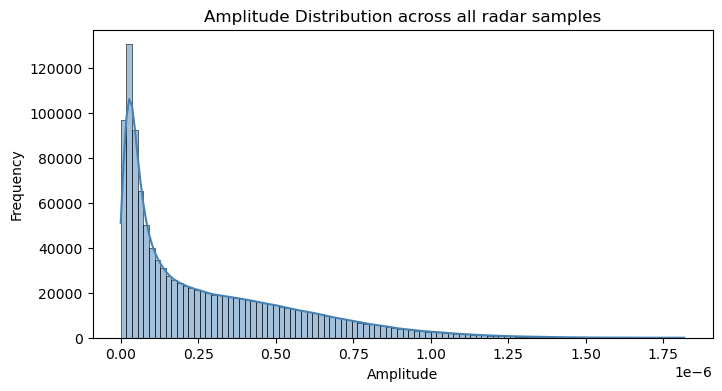

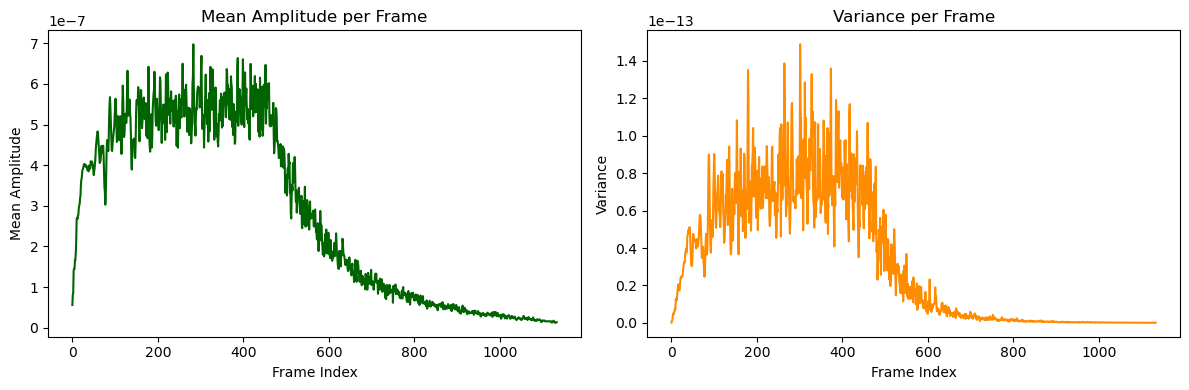

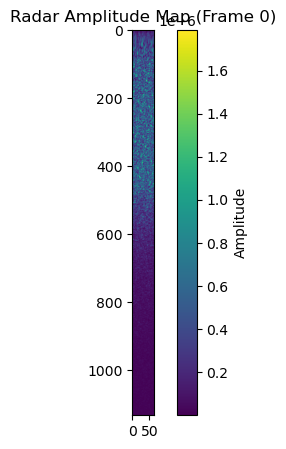

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ================================
# HallucinaRadar Data Inspection
# ================================
file_path = 'real1.mat'   # make sure this is uploaded to the repo

with h5py.File(file_path, 'r') as f:
    data = np.array(f['X_clut'])

complex_data = data['real'] + 1j * data['imag']

print("✅ Loaded radar dataset")
print("Shape:", complex_data.shape)
print("Example entry:", complex_data[0,0,0])

magnitude = np.abs(complex_data)

stats = {
    "mean_amplitude": np.mean(magnitude),
    "std_amplitude": np.std(magnitude),
    "min_amplitude": np.min(magnitude),
    "max_amplitude": np.max(magnitude),
    "dynamic_range_dB": 20 * np.log10(np.max(magnitude) / np.min(magnitude))
}

print("\n📈 Signal Statistics:")
for k, v in stats.items():
    print(f"{k:20s}: {v:.6f}")

frame_means = magnitude.mean(axis=(1,2))
frame_vars  = magnitude.var(axis=(1,2))

# ---- Plot amplitude distribution ----
plt.figure(figsize=(8,4))
sns.histplot(magnitude.flatten(), bins=100, kde=True, color='steelblue')
plt.title("Amplitude Distribution across all radar samples")
plt.xlabel("Amplitude")
plt.ylabel("Frequency")
plt.show()

# ---- Plot per-frame statistics ----
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].plot(frame_means, color='darkgreen')
ax[0].set_title("Mean Amplitude per Frame")
ax[0].set_xlabel("Frame Index")
ax[0].set_ylabel("Mean Amplitude")

ax[1].plot(frame_vars, color='darkorange')
ax[1].set_title("Variance per Frame")
ax[1].set_xlabel("Frame Index")
ax[1].set_ylabel("Variance")
plt.tight_layout()
plt.show()

# ---- Optional: visualize one frame ----
plt.figure(figsize=(6,5))
plt.imshow(np.abs(complex_data[:,:,0]), cmap='viridis')
plt.title("Radar Amplitude Map (Frame 0)")
plt.colorbar(label='Amplitude')
plt.show()
